In [6]:
import sys
import os
import numpy as np
import importlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
!ls ~/git/analysis_playground/ml/data/training_data

orhs			  orhs2-pars_q_values.npy   orhs4_data.npy
orhs1-pars_config.json	  orhs2_q_values.npy	    orhs4-noise_config.json
orhs1-pars_data.npy	  orhs3_config.json	    orhs4-noise_data.npy
orhs1-pars_pars.npy	  orhs3_data.npy	    orhs4-noise_pars.npy
orhs1-pars_q_values.npy   orhs3-noise_config.json   orhs4-noise_q_values.npy
orhs2_config.json	  orhs3-noise_data.npy	    orhs4-pars_config.json
orhs2_data.npy		  orhs3-noise_pars.npy	    orhs4-pars_data.npy
orhs2-noise_config.json   orhs3-noise_q_values.npy  orhs4_pars.npy
orhs2-noise_data.npy	  orhs3-pars_config.json    orhs4-pars_pars.npy
orhs2-noise_pars.npy	  orhs3-pars_data.npy	    orhs4-pars_q_values.npy
orhs2-noise_q_values.npy  orhs3_pars.npy	    orhs4_q_values.npy
orhs2-pars_config.json	  orhs3-pars_pars.npy	    orhs_config.json
orhs2-pars_data.npy	  orhs3-pars_q_values.npy   orhs_data.npy
orhs2_pars.npy		  orhs3_q_values.npy	    orhs_pars.npy
orhs2-pars_pars.npy	  orhs4_config.json	    orhs_q_values.npy


In [8]:
data_dir = os.path.expanduser("~m2d/git/analysis_playground/ml/data/training_data")

pars = np.load(os.path.join(data_dir, "orhs3-pars_pars.npy"))
refl = np.load(os.path.join(data_dir, "orhs3-pars_data.npy"))
q_values = np.load(os.path.join(data_dir, "orhs3-pars_q_values.npy"))

N_LAYERS = 3
print(pars.shape)
print(refl.shape)
print(q_values.shape)

refl_corrected = np.power(10, refl)/q_values**2*q_values[0]**2

idx = 0


(4000000, 10)
(4000000, 100)
(100,)


```
{"i": 0, "par": "roughness", "bounds": [4, 30]},
{"i": 1, "par": "sld", "bounds": [-1, 7]},
{"i": 1, "par": "thickness", "bounds": [20, 950]},
{"i": 1, "par": "roughness", "bounds": [20, 60]},
{"i": 2, "par": "sld", "bounds": [-1, 7]},
{"i": 2, "par": "thickness", "bounds": [50, 950]},
{"i": 2, "par": "roughness", "bounds": [20, 60]}
```

In [9]:
sys.path.append(os.path.expanduser("~/git/machine_learning/src"))
import structure_predictor as sp
import models

2023-11-29 09:16:09.705758: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-29 09:16:09.745610: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda/envs/tensorflow/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persisten

[-0.88362595 -0.29272975 -0.19260793 -0.51783963 -0.692521   -0.21902196
  0.13966556  0.02622882  0.47117779 -0.58751155]
1/1 [==============================] - 0s 177ms/step
[-0.8067083  -0.18987505 -0.10679259 -0.5851099  -0.6769558  -0.21692422
  0.10985704  0.05385555  0.39538828 -0.71906346]
# steps: 10, # draws: 2000

5.51   	 6.51   	 9.76   +- 7.91  
1.83   	 2.24   	 1.83   +- 0.16  
314.70 	 346.02 	 313.09 +- 134.00
29.64  	 28.30  	 27.91  +- 2.86  
0.23   	 0.29   	 0.31   +- 0.22  
323.34 	 324.08 	 324.96 +- 3.75  
42.79  	 42.20  	 41.50  +- 1.92  
3.10   	 3.22   	 3.10   +- 0.04  
564.91 	 538.39 	 564.87 +- 2.28  
28.25  	 25.62  	 28.34  +- 0.43  


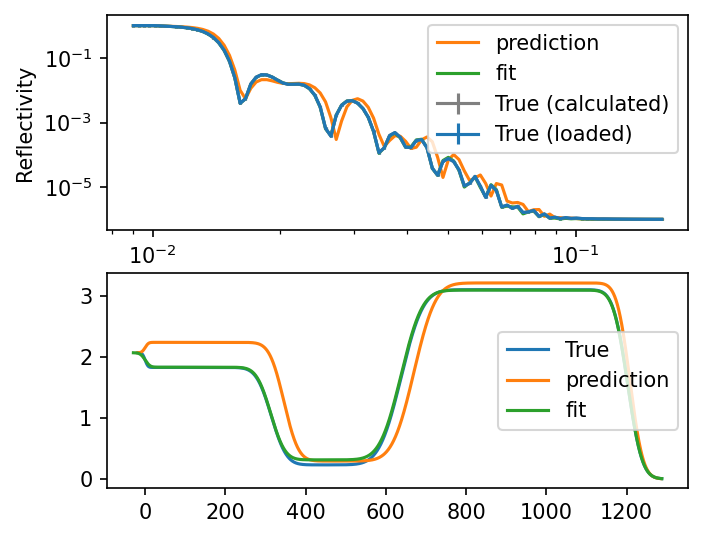

In [12]:
importlib.reload(sp)
idx+=1


predictor = sp.StructurePredictor(os.path.expanduser("~m2d/git/machine_learning/src/settings.json"))

cnn_model = predictor.parameter_predictors[N_LAYERS]

print(pars[idx])

predicted_pars = cnn_model.predict(np.asarray([refl[idx]]))
print(predicted_pars[0])
predicted_pars = predictor.rescale_real_pars(predicted_pars, N_LAYERS)

real_parameters = predictor.rescale_real_pars([pars[idx]], N_LAYERS) 

fig, ax = plt.subplots(2, 1, dpi=150, figsize=(5, 4.1))
q, r, z, sld = sp.calculate_reflectivity(q_values, real_parameters[0])

plt.subplot(2,1,1)
plt.errorbar(q_values, r, yerr=0.07*r, label='True (calculated)', color='grey')
plt.errorbar(q_values, refl_corrected[idx], yerr=0.07*refl_corrected[idx], label='True (loaded)')
plt.subplot(2,1,2)
plt.plot(z, sld, label='True')


fit_pars, fit_errs = sp.fit_data(q_values, refl_corrected[idx], predicted_pars[0], errors=0.07*refl_corrected[idx])

q, r, z, sld = sp.calculate_reflectivity(q_values, predicted_pars[0])
plt.subplot(2,1,1)
plt.plot(q_values, r, label='prediction')
plt.subplot(2,1,2)
plt.plot(z, sld, label='prediction')


q, r, z, sld = sp.calculate_reflectivity(q_values, fit_pars)
plt.subplot(2,1,1)
plt.plot(q_values, r, label='fit')
plt.subplot(2,1,2)
plt.plot(z, sld, label='fit')

print()

plt.subplot(2,1,1)
plt.xlabel('Q ($1/\AA$)', fontsize=10)
plt.ylabel('Reflectivity', fontsize=10)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.subplot(2,1,2)
plt.legend()


for i in range(len(real_parameters[0])):
    print("%-6.2f \t %-6.2f \t %-6.2f +- %-6.2f" % (real_parameters[0][i], predicted_pars[0][i], fit_pars[i], fit_errs[i]))

In [14]:
importlib.reload(sp)

#data = np.loadtxt(os.path.expanduser("~m2d/git/machine_learning/data/haynes_off_off_v2.dat")).T
data = np.loadtxt(os.path.expanduser("~m2d/git/machine_learning/data/REFL_207296_combined_data_auto.txt")).T



data_interp = np.interp(q_values, data[0], data[1])
err_interp = np.interp(q_values, data[0], data[2])
data_proc = np.log10(data_interp*q_values**2/q_values[0]**2)

N_LAYERS_DATA = 2

predictor = sp.StructurePredictor(os.path.expanduser("~m2d/git/machine_learning/src/settings.json"))
cnn_model = predictor.parameter_predictors[N_LAYERS_DATA]

predicted_pars = cnn_model.predict(np.asarray([data_proc]))
predicted_pars = predictor.rescale_real_pars(predicted_pars, N_LAYERS_DATA)

fit_pars, fit_errs = sp.fit_data(data[0], data[1], predicted_pars[0], errors=data[2], bck=0, samples=4000)



fig, ax = plt.subplots(2, 1, dpi=150, figsize=(5, 4.1))

plt.subplot(2,1,1)
plt.errorbar(data[0], data[1], yerr=data[2], label='True (loaded)')


q, r, z, sld = sp.calculate_reflectivity(q_values, predicted_pars[0], bck=0)
plt.subplot(2,1,1)
plt.plot(q_values, r, label='prediction')
plt.subplot(2,1,2)
plt.plot(z, sld, label='prediction')


q, r, z, sld = sp.calculate_reflectivity(q_values, fit_pars, bck=0)
plt.subplot(2,1,1)
plt.plot(q_values, r, label='fit')
plt.subplot(2,1,2)
plt.plot(z, sld, label='fit')

print()

plt.subplot(2,1,1)
plt.xlabel('Q ($1/\AA$)', fontsize=10)
plt.ylabel('Reflectivity', fontsize=10)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.subplot(2,1,2)
plt.legend()


for i in range(len(predicted_pars[0])):
    print("%-6.2f \t %-6.2f +- %-6.2f" % (predicted_pars[0][i], fit_pars[i], fit_errs[i]))

1/1 [==============================] - 0s 125ms/step


TypeError: fit_data() got an unexpected keyword argument 'bck'

L_top 200 | SLD_top = 4.8 | rough_top = 25 

L_bot = 161 | SLD_bot = 7.6 | rough_bot 24

rough_sub = 10

L_top 200
SLD_top = 4.8
rough_top = 25
L_bot = 161
SLD_bot = 6.8
rough_bot 24
rough_sub = 10



157/157 [==============================] - 0s 2ms/step


Text(0.5, 0, 'a for index 1')

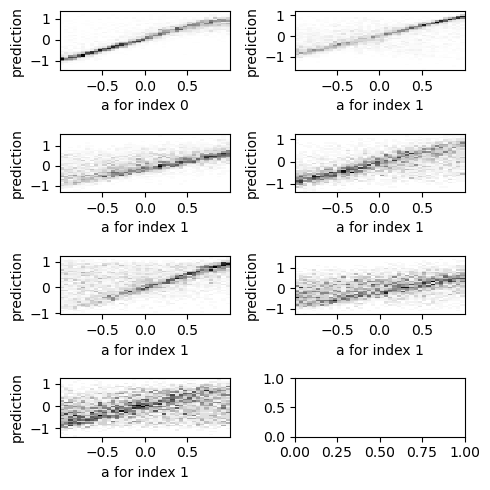

In [7]:
cnn_model=models.load_model("cnn2layer", os.path.expanduser("~m2d/git/machine_learning/data"))

preds=cnn_model.predict(refl[:5000])

n_bins=40

fig, axs= plt.subplots(4,2, sharey=False, tight_layout= True, dpi=100, figsize= (5,5))
true_values=pars[:5000]

ax=plt.subplot(4, 2, 1)
ax.hist2d(true_values[:,0], preds[:,0], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 0')

ax=plt.subplot(4, 2, 2)
ax.hist2d(true_values[:,1], preds[:,1], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')

ax=plt.subplot(4, 2, 3)
ax.hist2d(true_values[:,2], preds[:,2], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 4)
ax.hist2d(true_values[:,3], preds[:,3], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 5)
ax.hist2d(true_values[:,4], preds[:,4], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 6)
ax.hist2d(true_values[:,5], preds[:,5], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')


ax=plt.subplot(4, 2, 7)
ax.hist2d(true_values[:,6], preds[:,6], bins=n_bins, cmap= "Greys")
plt.ylabel('prediction')
plt.xlabel('a for index 1')




# steps: 25, # draws: 2000
# steps: 15, # draws: 2100
# steps: 10, # draws: 2000
# steps: 8, # draws: 2080


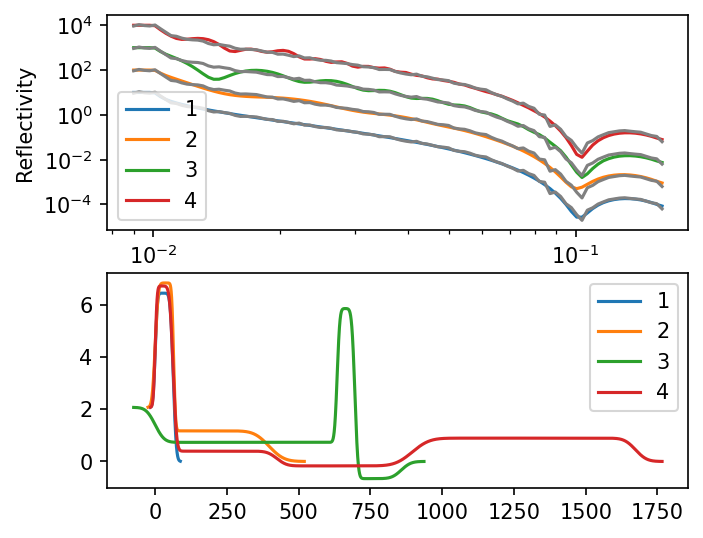

In [15]:
importlib.reload(sp)

#data = np.loadtxt(os.path.expanduser("~m2d/git/machine_learning/data/haynes_off_off_v2.dat")).T
#data = np.loadtxt(os.path.expanduser("~m2d/git/machine_learning/data/REFL_206850_combined_data_auto.txt")).T
data = np.loadtxt(os.path.expanduser("~m2d/git/machine_learning/data/M191794.dat")).T
#data = np.loadtxt(os.path.expanduser("~m2d/git/machine_learning/data/M191698.dat")).T


data_interp = np.interp(q_values, data[0], data[1])
err_interp = np.interp(q_values, data[0], data[2])
data_proc = np.log10(data_interp*q_values**2/q_values[0]**2)

predictor = sp.StructurePredictor(os.path.expanduser("~m2d/git/machine_learning/src/settings.json"))

layers, pars, unscaled_pars = predictor.big_predict([[data_proc]], q_values, True, True)

In [22]:
print(layers)
print(pars[0][0])

[[1.]]
[5.881067759008732, 6.441915354068208, 63.00769815483248, 8.143058529893754]


# 191794 - Sample 1

| Parameter | Value | Prediction |
|---|---|---|
| Bulk thickness | 63.3 +- 0.5 | 63 |
| Bulk SLD | 6.52 +- 0.04 | 6.4 |
| Bulk roughness | 7.158 +- 0.064 | 5.9 |
| Si oxide thickness | 24.1 +- 5.4 | - |
| Si oxide SLD | 1.84 +- 0.28 | - |
| Si oxide roughness | 7.9 +- 0.3 | - |
| Si roughness | 4.3 +- 2.5 | 8.1 |

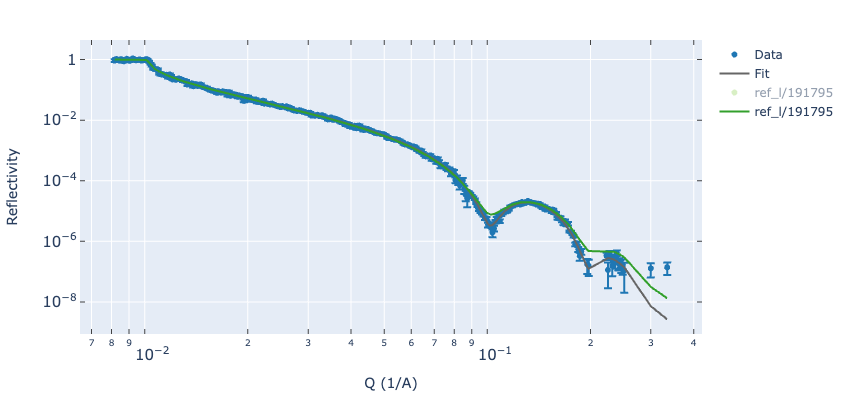
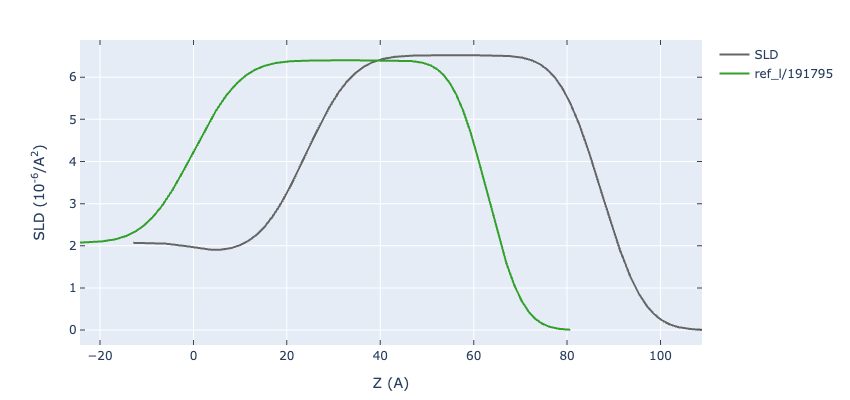

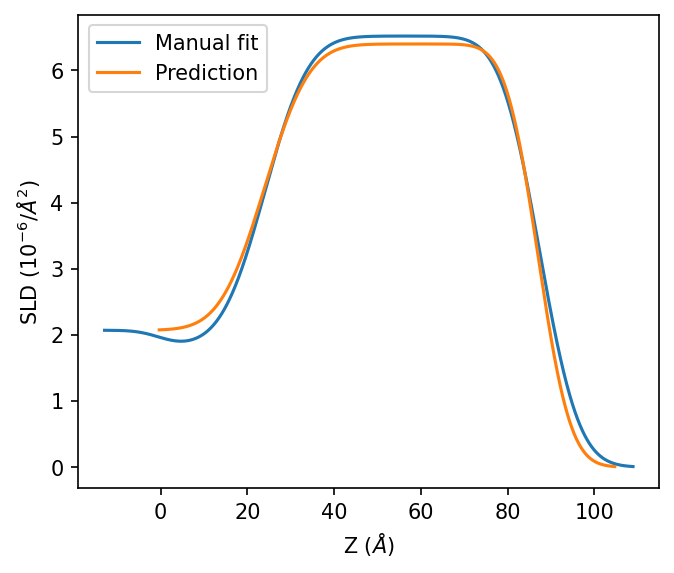

In [63]:
profile_manual = np.loadtxt(os.path.expanduser("~m2d/reflectivity_fits/IPTS-26010/191794/__model-profile.dat")).T
profile_ml = np.loadtxt(os.path.expanduser("~m2d/reflectivity_fits/IPTS-26010/191795/__model-profile.dat")).T

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.plot(profile_manual[0], profile_manual[1], label='Manual fit')
plt.plot(profile_ml[0]+24, profile_ml[1], label='Prediction')


plt.ylabel('SLD ($10^{-6}/\AA^2)$', fontsize=10)
plt.xlabel('Z ($\AA$)', fontsize=10)

plt.legend()


/opt/anaconda/envs/tensorflow/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# steps: 25, # draws: 2000
# steps: 15, # draws: 2100
# steps: 10, # draws: 2000
# steps: 8, # draws: 2080


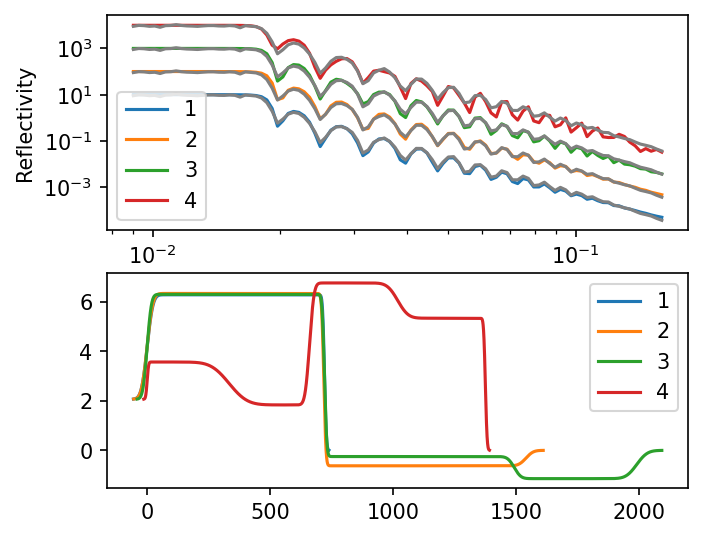

In [23]:
importlib.reload(sp)

#data = np.loadtxt(os.path.expanduser("~m2d/git/machine_learning/data/haynes_off_off_v2.dat")).T
#data = np.loadtxt(os.path.expanduser("~m2d/git/machine_learning/data/REFL_206864_combined_data_auto.txt")).T
#data = np.loadtxt(os.path.expanduser("~m2d/git/machine_learning/data/M191794.dat")).T
data = np.loadtxt(os.path.expanduser("~m2d/git/machine_learning/data/M191698.dat")).T


data_interp = np.interp(q_values, data[0], data[1])
err_interp = np.interp(q_values, data[0], data[2])
data_proc = np.log10(data_interp*q_values**2/q_values[0]**2)

predictor = sp.StructurePredictor(os.path.expanduser("~m2d/git/machine_learning/src/settings.json"))

layers, pars, unscaled_pars = predictor.big_predict([[data_proc]], q_values, True, True)

In [24]:
print(layers)
print(pars[0][0])

[[1.]]
[18.636165379412, 6.2907113046602205, 720.5575670031756, 6.055098808182011]


# 191698 - Sample 2


| Parameter | Value | Prediction |
|---|---|---|
| Bulk thickness | 725.2 +- 0.7 | 721 |
| Bulk SLD | 6.2 +- 0.01 | 6.3 |
| Bulk roughness | 6.7 +- 0.1 | 18.6 |
| Si oxide thickness | 22.8 +- 2.4 | - |
| Si oxide SLD | 1.1 +- 0.2 | - |
| Si oxide roughness | 11.9 +- 0.7 | - |
| Si roughness | 6.9 +- 2.9 | 6.1 |

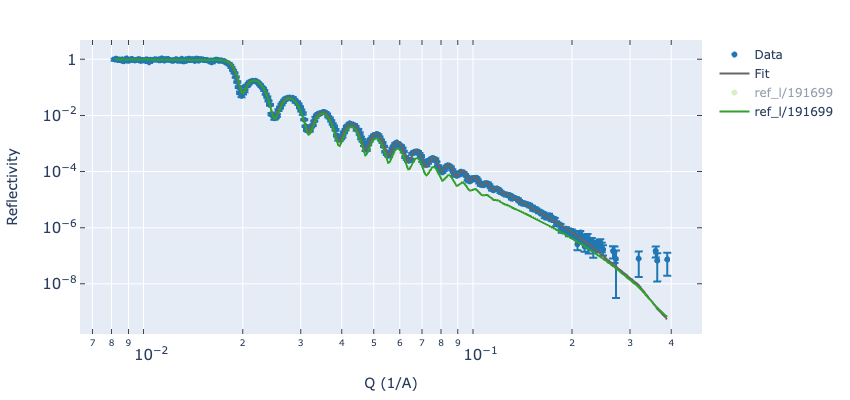
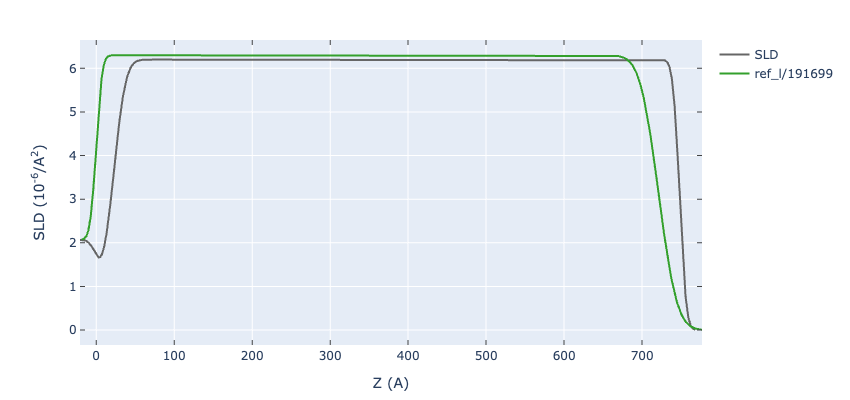


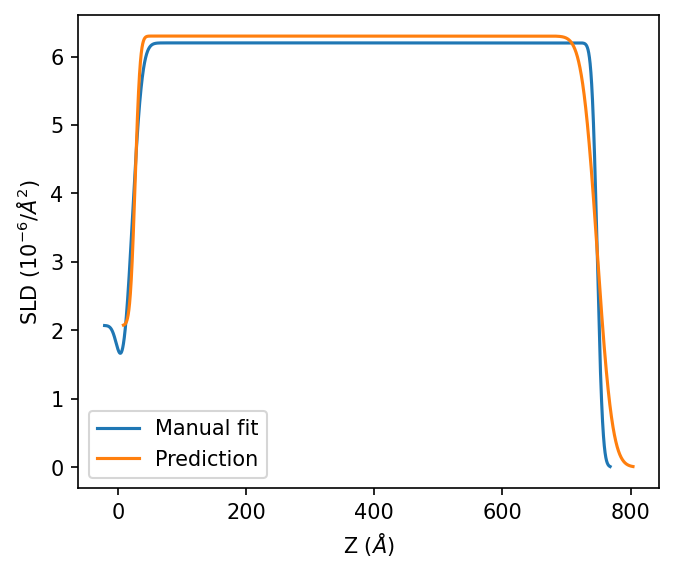

In [66]:
profile_manual = np.loadtxt(os.path.expanduser("~m2d/reflectivity_fits/IPTS-26010/191698/__model-profile.dat")).T
profile_ml = np.loadtxt(os.path.expanduser("~m2d/reflectivity_fits/IPTS-26010/191699/__model-profile.dat")).T

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.plot(profile_manual[0], profile_manual[1], label='Manual fit')
plt.plot(profile_ml[0]+27, profile_ml[1], label='Prediction')


plt.ylabel('SLD ($10^{-6}/\AA^2)$', fontsize=10)
plt.xlabel('Z ($\AA$)', fontsize=10)

plt.legend()

/opt/anaconda/envs/tensorflow/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# steps: 25, # draws: 2000
# steps: 15, # draws: 2100
# steps: 10, # draws: 2000
# steps: 8, # draws: 2080


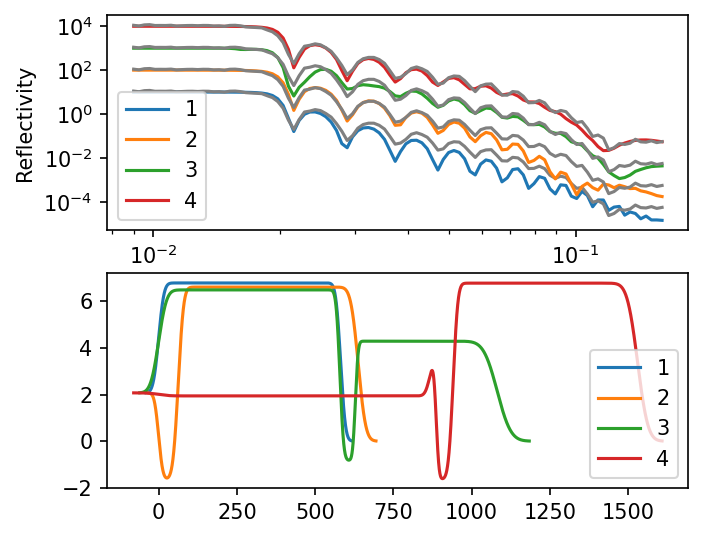

In [29]:
importlib.reload(sp)

data = np.loadtxt(os.path.expanduser("~m2d/git/machine_learning/data/REFL_206864_combined_data_auto.txt")).T
data = np.loadtxt(os.path.expanduser("/SNS/REF_L/IPTS-30101/shared/autoreduce/REFL_206_combined_data_auto.txt")).T

data_interp = np.interp(q_values, data[0], data[1])
err_interp = np.interp(q_values, data[0], data[2])
data_proc = np.log10(data_interp*q_values**2/q_values[0]**2)

predictor = sp.StructurePredictor(os.path.expanduser("~m2d/git/machine_learning/src/settings.json"))

layers, pars, unscaled_pars = predictor.big_predict([[data_proc]], q_values, True, True)

In [38]:
print(layers)
print(pars[0][int(layers[0][0])-1])

[[4.]]
[26.59976390817404, 1.9399877714263445, 869.1576551050453, 13.128217682343372, 3.990273289499441, 17.424249599878216, 7.246401020079012, -1.6361060874314601, 54.22426960571356, 11.949506822921057, 6.774363101720575, 589.2699468896059, 26.11055008166591]


# 206822 - Copper on titanium

The bottom layer was predicted with an SLD of 1.94, which is very close to silicon.

| Parameter | Value | Prediction |
|---|---|---|
| Cu thickness | 577.6 +- 0.4 | 589 |
| Cu SLD       | 6.4 +- 0.02  | 6.77 |
| Cu roughness | 17.0 +- 0.3  | 26.1 |
| Ti thickness | 51.4 +- 0.5 | 54.2 |
| Ti SLD       | -2.00 +- 0.02  | -1.63 |
| Ti roughness | 8.9 +- 0.1   | 11.9 |
| Si oxide thickness | 32 +- 4 | 17.4 |
| Si oxide SLD       | 2.5 +- 0.2  | 3.99 |
| Si oxide roughness | 8.6 +- 0.5 | 7.2 |
| Si roughness       | 6.0 +- 2.6  | 13.1 |

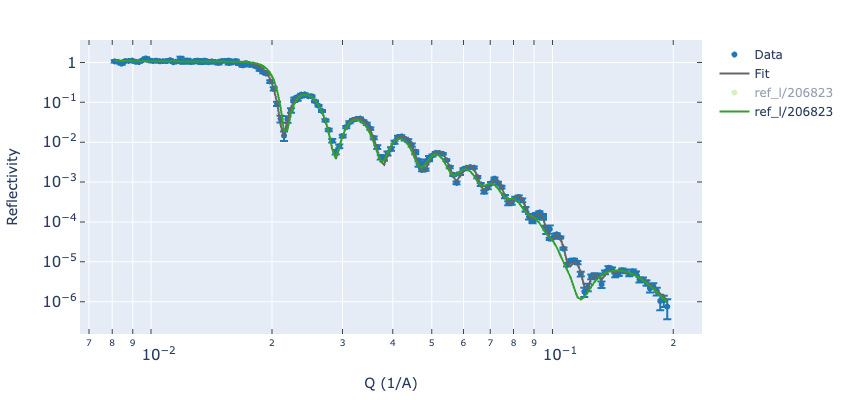
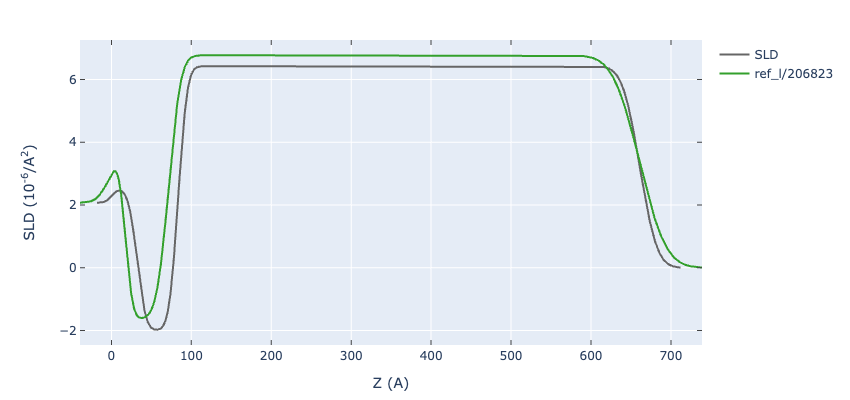